# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
tomato = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
print(tomato.prettify())

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <main>
   <div class="container py-4">
    <header class="pb-3 mb-4 border-bottom">
     <a class="d-flex align-items-center text-dark text-decoration-none" href="/">
      <span class="fs-4">
       Mission To Mars
      </span>
     </a>
    </header>
    <div class="p-5 mb-4 bg-light rounded-3">
     <div class="container-fluid py-5">
      <h1 class="display-5 fw-bold">
       Mars Temperature Data
      </h1>
      <p class="col-md-8 fs-4">
       This is Mars data.
      </p>
      <table class="table">
       <tbody>
        <tr>
         <th>
          id
         </th>
         <th>
          terrestrial_date
     

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
t = []
# Loop through the scraped data to create a list of rows


In [9]:
# the start of the for loop needs to be table vales
to = tomato.find_all('tr', class_='data-row')

for head in to:


    row = {}
    row['id']= head.find_all('td')[0].string
    row['date'] = head.find_all('td')[1].string
    row['sol']= head.find_all('td')[2].string
    row['ls']= head.find_all('td')[3].string
    row['month']= head.find_all('td')[4].string
    row['min_temp']= head.find_all('td')[5].text
    row['pressure']= head.find_all('td')[6].string
    t.append(row)
t

[{'id': '2',
  'date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},
 {'id': '79',
  'date': '2012-08-23',
  'sol': '17',
  'ls': '159',
  'month': '6',


# contents, string, text

In [10]:
Ndf = pd.DataFrame(t)
Ndf.head()

,id,date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [ ]:
# Examine data type of each column


In [28]:
display(Ndf.dtypes)

id          object
date        object
sol         object
ls          object
month       object
min_temp    object
pressure    object
dtype: object

In [30]:
Ndf.date = pd.to_datetime(Ndf.date)
Ndf.sol = Ndf.sol.astype('int')
Ndf.ls = Ndf.ls.astype('int')
Ndf.month = Ndf.month.astype('int')
Ndf.min_temp = Ndf.min_temp.astype('float')
Ndf.pressure = Ndf.pressure.astype('float')

In [31]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [32]:
# 1. How many months are there on Mars?

# Mars has a year that is 687 earth days (or 1.88 years). However the metadata says that the month column is 
# for the martian month, of which we have 12.
# Mars year info: https://mars.nasa.gov/all-about-mars/facts/mars-year/

# nunique refrence:
# https://www.statology.org/pandas-count-unique-values/#:~:text=You%20can%20use%20the%20nunique%20%28%29%20function%20to,df.nunique%28%29%20%23count%20unique%20values%20in%20each%20row%20df.nunique%28axis%3D1%29
#df['month'].nunique() 

df['month'].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [18]:
# 2. How many Martian days' worth of data are there?
df['sol'].value_counts().sum()

1867

In [19]:
# 3. What is the average low temperature by month?
temp = df.groupby('month')['min_temp'].mean()
temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [33]:
# our warmest ("summer") months are martin months 8 and 9. The "Martin winter" seems to be in months 3 and 4 where the 
# rover is. months 1, 6, 7 and 12 are in the middle of the average tempratures, puting them in martian 'spring/fall'
temp.sort_values()

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

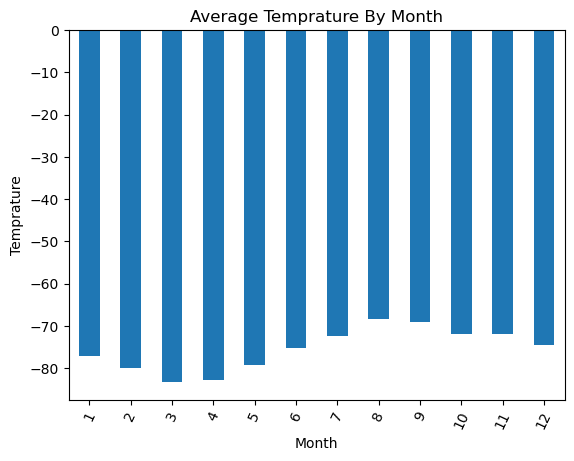

In [21]:
# Plot the average temperature by month

temp.plot.bar()
#place key out of frame, to better see bars
##place key out of frame, to better see bars

plt.title('Average Temprature By Month')
plt.xlabel('Month')
plt.ylabel('Temprature')
plt.xticks(rotation=65)
plt.show()

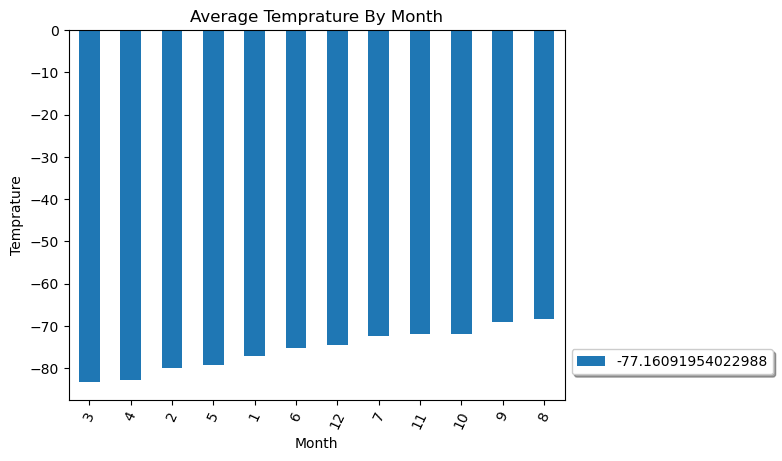

In [22]:
# Identify the coldest and hottest months in Curiosity's location
temp.sort_values().plot.bar()
#place key out of frame, to better see bars
##place key out of frame, to better see bars
plt.legend(temp, loc='lower left', bbox_to_anchor=(1, 0.05),
          ncol=1, fancybox=True, shadow=True)
plt.title('Average Temprature By Month')
plt.xlabel('Month')
plt.ylabel('Temprature')
plt.xticks(rotation=65)
plt.show()

In [23]:
# 4. Average pressure by Martian month
press = df.groupby('month')['pressure'].mean()
press

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

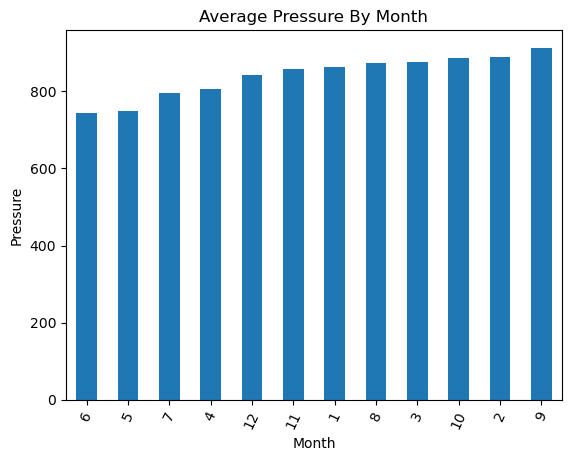

In [24]:
# Plot the average pressure by month
press.sort_values().plot.bar()
#place key out of frame, to better see bars
##place key out of frame, to better see bars

plt.title('Average Pressure By Month')
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.xticks(rotation=65)
plt.show()
# Intrestingly the air pressure order is not directly related to the average temprature order

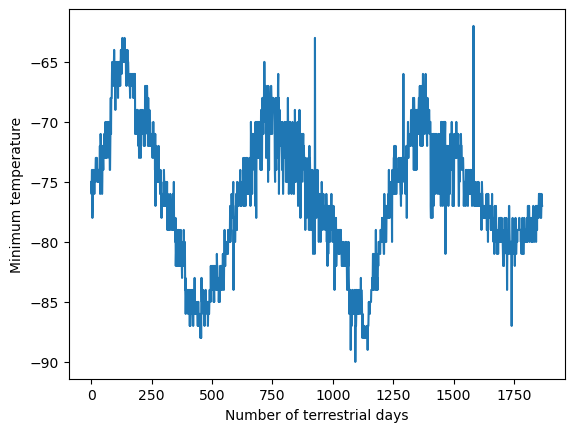

In [25]:
# 5. How many terrestrial (earth) days are there in a Martian year?

df.min_temp.plot()
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show()
# counting from trough to trough (days ~490 to ~1125) gives ~635 days which is a little less than the 668 days that 
#can be caluclated from the year length devided by the ratio of an earth day to a martin day
#(687 earth days/ 668 martian sols https://mars.nasa.gov/all-about-mars/facts/mars-year/)

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV
df.to_csv('Mars_Weather')


In [27]:
browser.quit()